In [72]:
import time 
import alpaca_trade_api as alpaca 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
import backtrader as bt
from datetime import datetime
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import numpy as np

In [73]:
ENDPOINT="https://paper-api.alpaca.markets"
API_KEY_ID="PKTCAGBR2D97MZXNAQMF" # Put in yours here - Needed for paper trading
SECRET_KEY="PDuEwQYloK9uBw8nJDqeVkMqJJ3alIe8KT20eahJ" # Put in yours here - Needed for paper trading

class Get_prices:
    def __init__(self,STOCK):
        self.api = alpaca.REST(API_KEY_ID, SECRET_KEY, ENDPOINT)
        self.STOCK = STOCK        
        # Anything else you want to initialize or a method you want to
        # call during initialization of class - Feel free to add
        
        # Get past 90 days closing prices
        # self.get_pastyear_closing_prices()
        
    
    def get_pastyear_closing_prices(self):  
        # barset = self.api.get_barset(self.STOCK, 'day', limit=255).df
        barset = self.api.get_barset(self.STOCK, 'day', limit=365)
        bars = barset[self.STOCK]
        pastyear_closing_prices = [bars[index].c for index in range(len(bars))]
        return pastyear_closing_prices

    def get_pastyear_opening_prices(self):  
        # barset = self.api.get_barset(self.STOCK, 'day', limit=255).df
        barset = self.api.get_barset(self.STOCK, 'day', limit=365)
        bars = barset[self.STOCK]
        pastyear_opening_prices = [bars[index].o for index in range(len(bars))]
        return pastyear_opening_prices
    
    def get_pastyear_prices(self):  
        # barset = self.api.get_barset(self.STOCK, 'day', limit=255).df
        return self.api.get_barset(self.STOCK, 'day', limit=365)

5 stocks that I choose are AAPLE, TESLA, NETFLIX, GOOGLE, NVIDA

# Download Dataset

In [74]:
aapl =  Get_prices('AAPL')
aapl_opening_prices = aapl.get_pastyear_opening_prices()
aapl_closing_prices = aapl.get_pastyear_closing_prices()

tsla =  Get_prices('TSLA')
tsla_opening_prices = tsla.get_pastyear_opening_prices()
tsla_closing_prices = tsla.get_pastyear_closing_prices()

nflx =  Get_prices('NFLX')
nflx_opening_prices = nflx.get_pastyear_opening_prices()
nflx_closing_prices = nflx.get_pastyear_closing_prices()

nvda =  Get_prices('NVDA')
nvda_opening_prices = nvda.get_pastyear_opening_prices()
nvda_closing_prices = nvda.get_pastyear_closing_prices()

goog =  Get_prices('GOOG')
goog_opening_prices = goog.get_pastyear_opening_prices()
goog_closing_prices = goog.get_pastyear_closing_prices()

tsla.get_pastyear_prices().df['TSLA'].to_csv('tsla.csv')
nflx.get_pastyear_prices().df['NFLX'].to_csv('nflx.csv')
aapl.get_pastyear_prices().df['AAPL'].to_csv('aapl.csv')
nvda.get_pastyear_prices().df['NVDA'].to_csv('nvda.csv')
goog.get_pastyear_prices().df['GOOG'].to_csv('goog.csv')

C:\Users\gxysi\AppData\Local\Temp/ipykernel_33556/3414844088.py:25: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  barset = self.api.get_barset(self.STOCK, 'day', limit=365)
C:\Users\gxysi\AppData\Local\Temp/ipykernel_33556/3414844088.py:18: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  barset = self.api.get_barset(self.STOCK, 'day', limit=365)


In [75]:
#pick first 7-month data
aapl_opening_prices_1 = aapl_opening_prices[0:213]
aapl_closing_prices_1 = aapl_closing_prices[0:213]

tsla_opening_prices_1 = tsla_opening_prices[0:213]
tsla_closing_prices_1 = tsla_closing_prices[0:213]

nflx_opening_prices_1 = nflx_opening_prices[0:213]
nflx_closing_prices_1 = nflx_closing_prices[0:213]

goog_opening_prices_1 = goog_opening_prices[0:213]
goog_closing_prices_1 = goog_closing_prices[0:213]

nvda_opening_prices_1 = nvda_opening_prices[0:213]
nvda_closing_prices_1 = nvda_closing_prices[0:213]

# SMA & EMA

In [76]:
def SMA_EMA_plot(data,window,name):
    
    data_df = pd.DataFrame(columns=['close'])
    data_df['close'] = data
    
    SMA = pd.DataFrame(columns = ['close'])
    EMA = pd.DataFrame(columns=['close'])
    
    SMA['close'] = data_df['close'].rolling(window = window).mean()
    EMA['close'] = data_df['close'].ewm(span = window).mean()
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(data, label = name)
    plt.plot(SMA['close'],label = 'SMA')
    plt.plot(EMA['close'],label = 'EMA')
    plt.title(name)
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


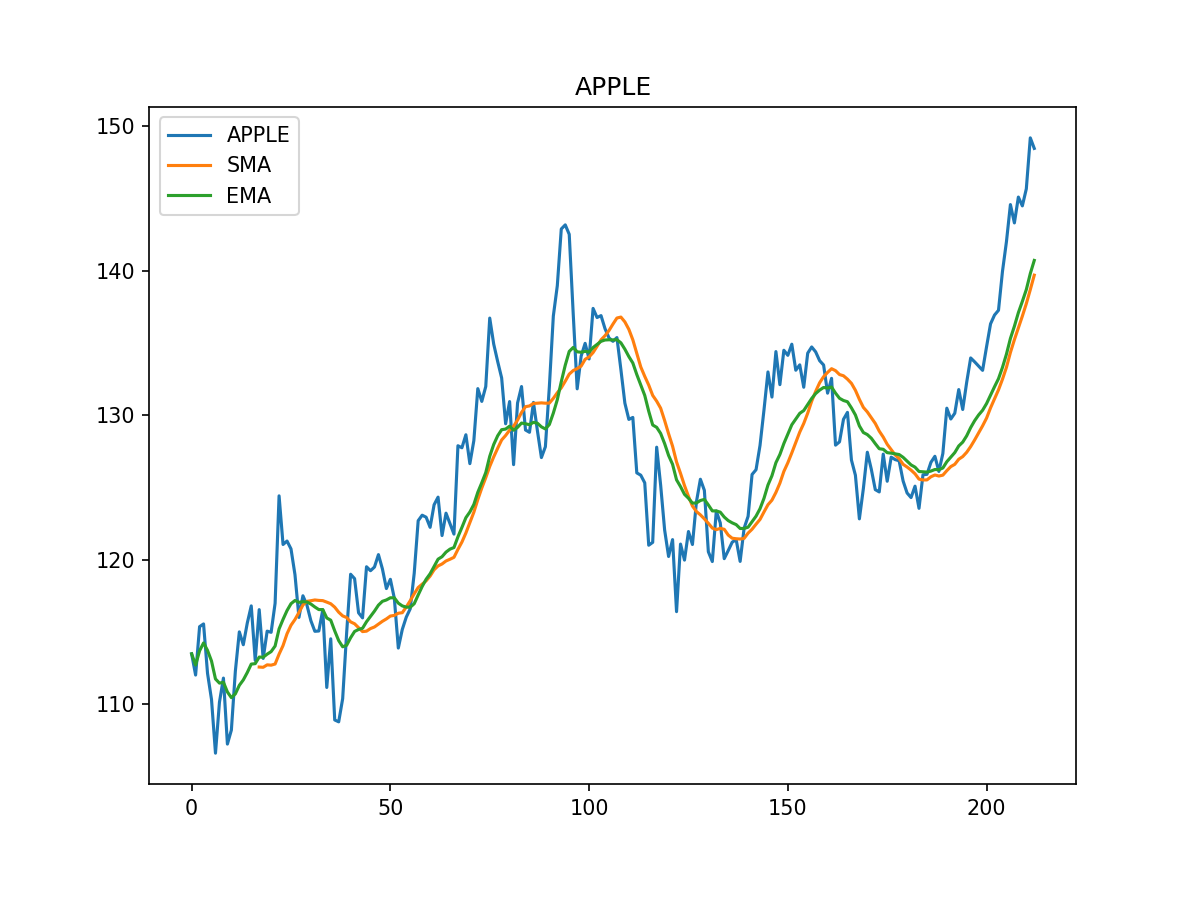

In [78]:
SMA_EMA_plot(aapl_closing_prices_1,18,'APPLE')

<IPython.core.display.Javascript object>


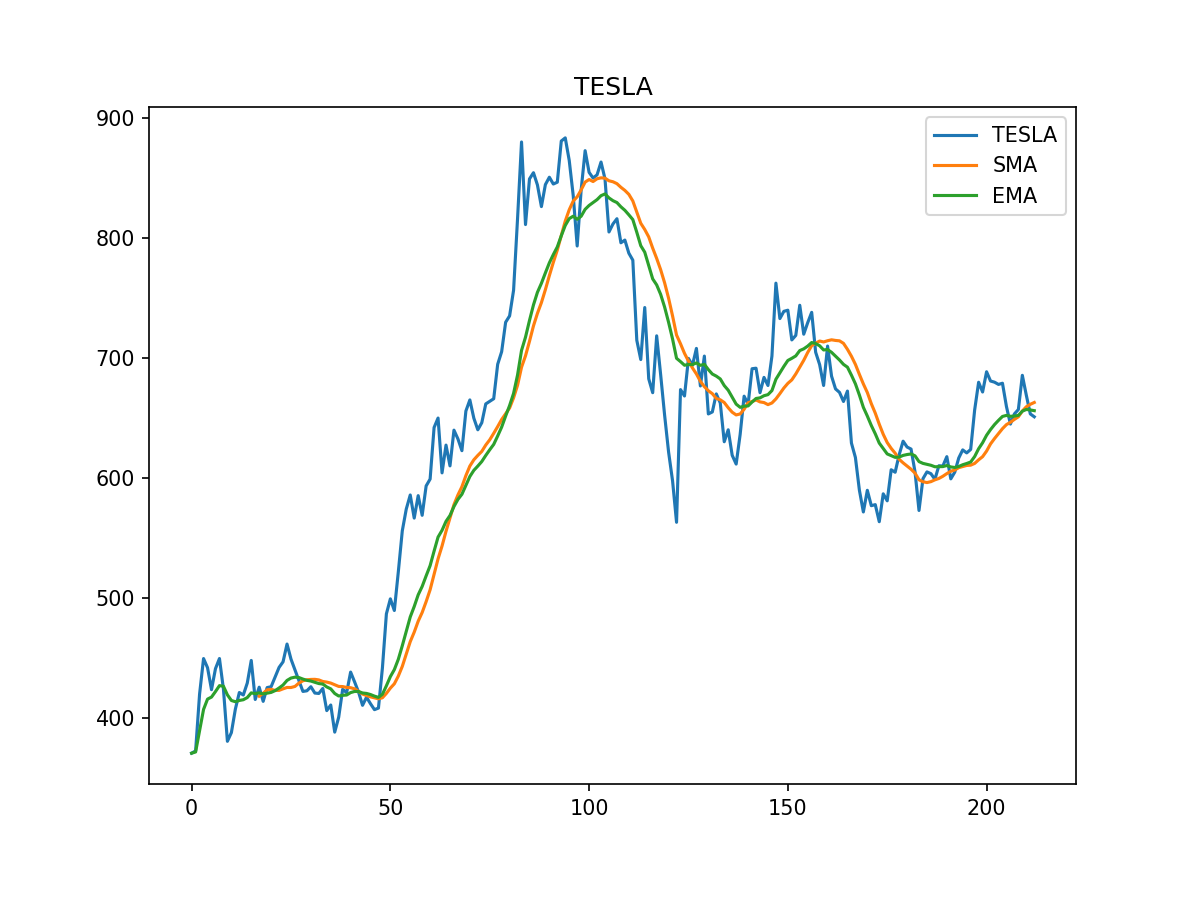

In [79]:
SMA_EMA_plot(tsla_closing_prices_1,18,'TESLA')

<IPython.core.display.Javascript object>


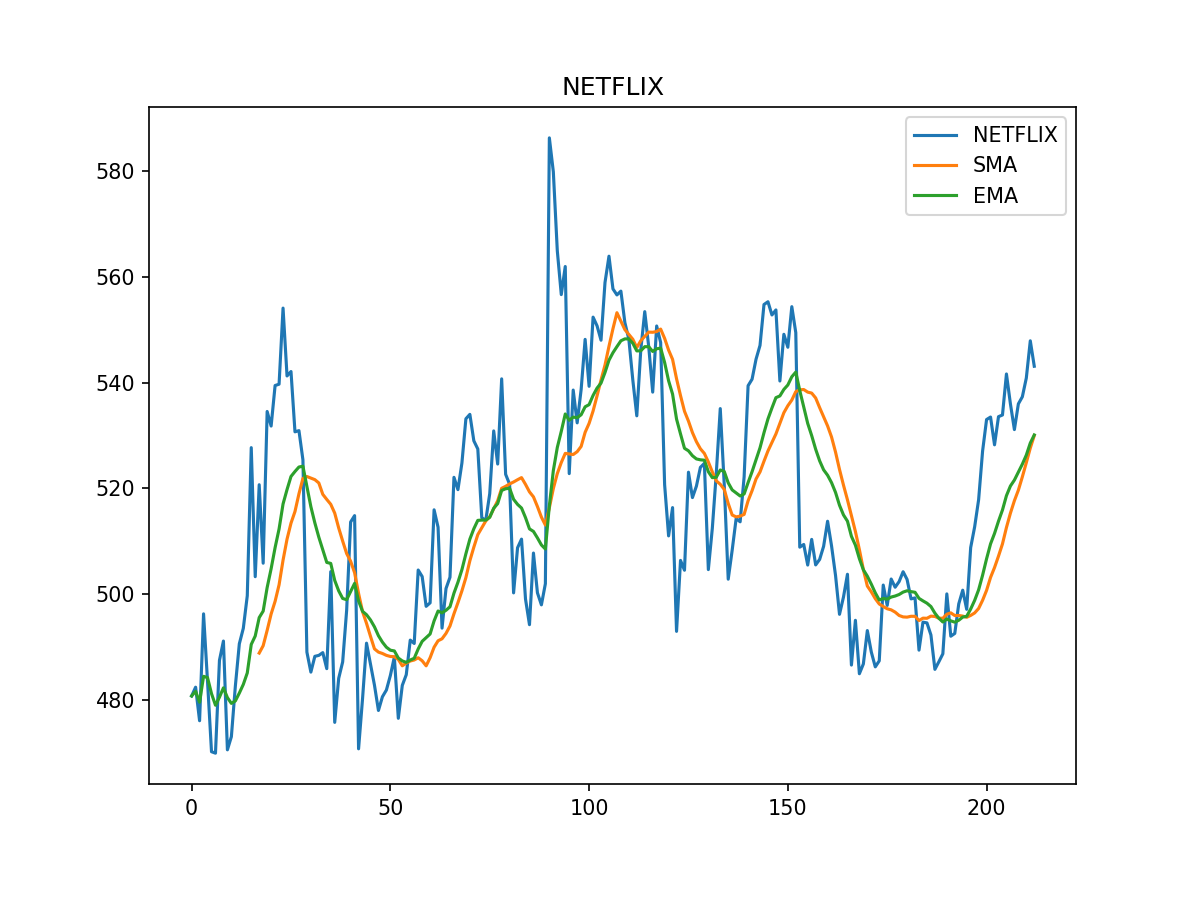

In [80]:
SMA_EMA_plot(nflx_closing_prices_1,18,'NETFLIX')

<IPython.core.display.Javascript object>


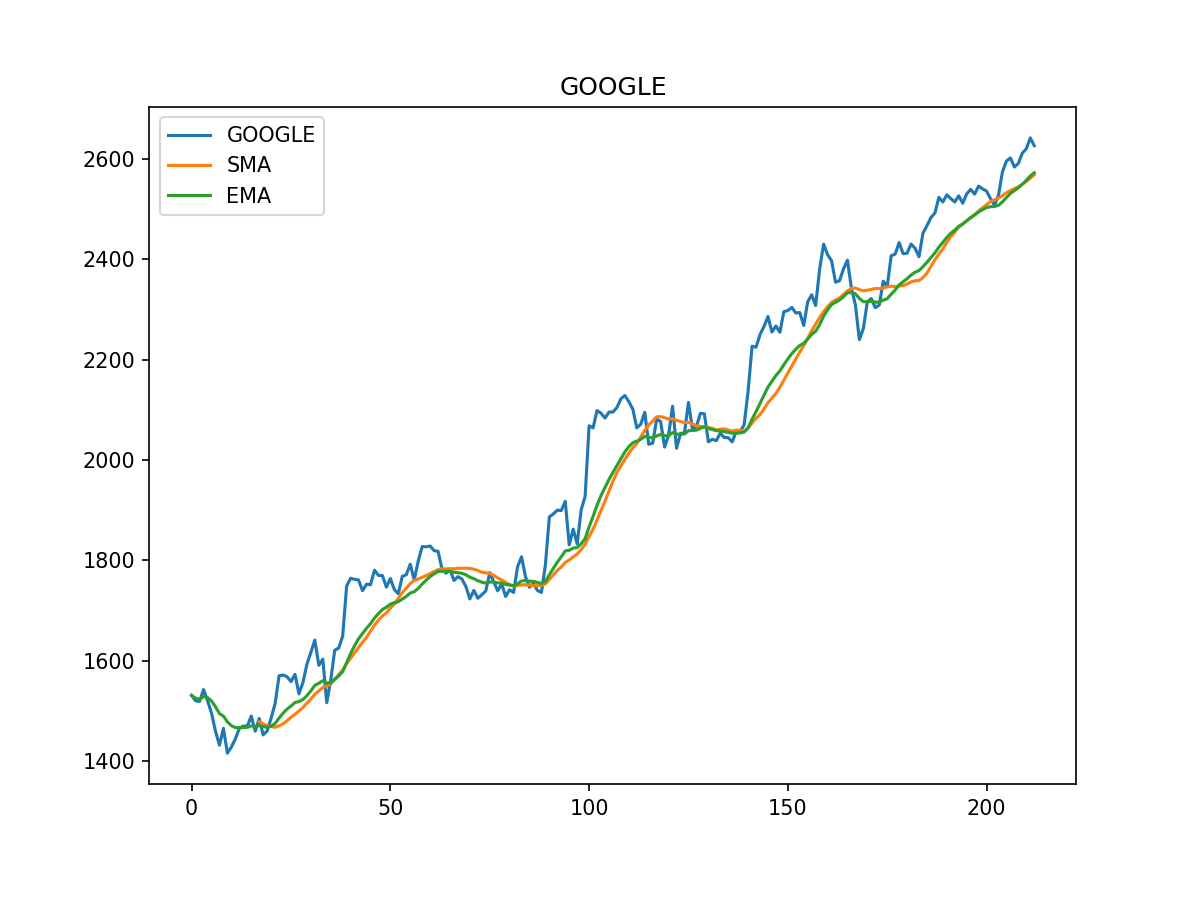

In [81]:
SMA_EMA_plot(goog_closing_prices_1,18,'GOOGLE')

<IPython.core.display.Javascript object>


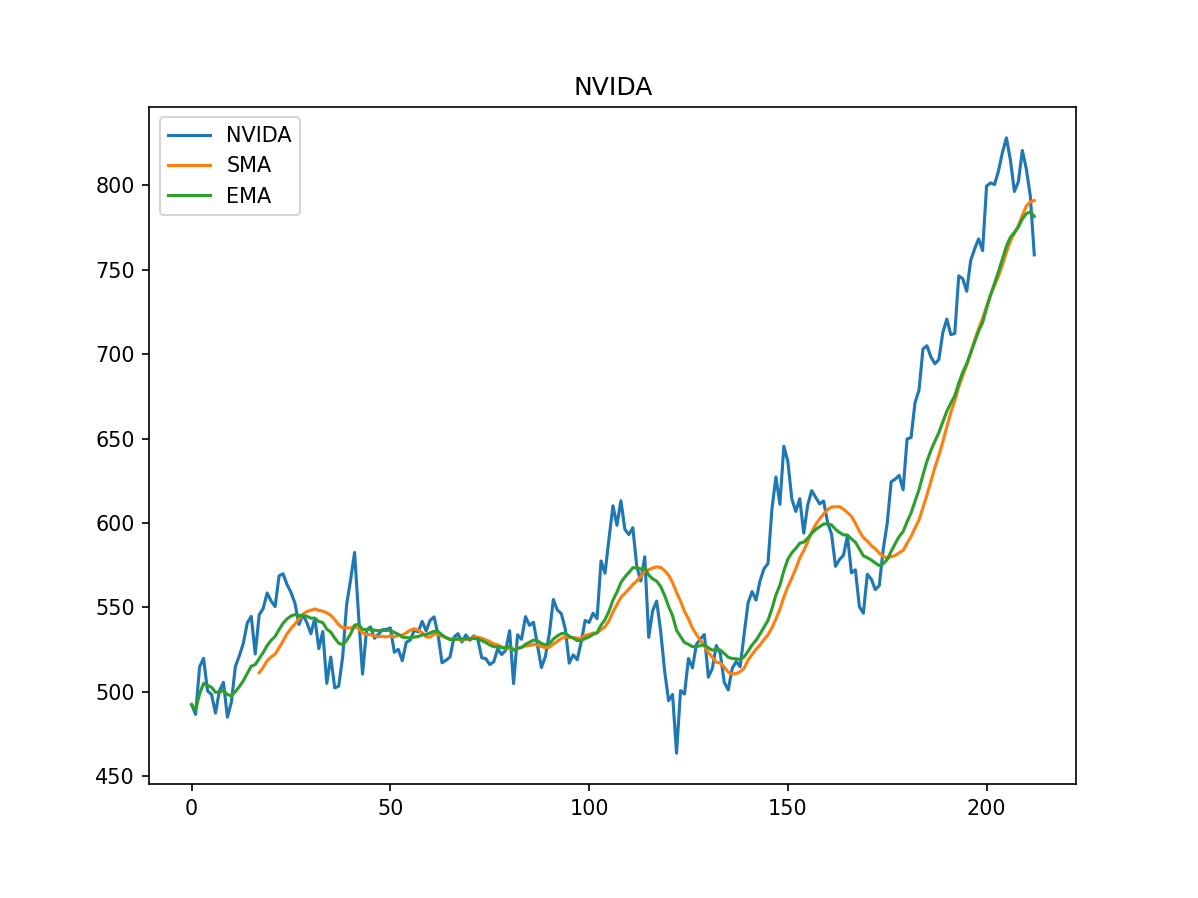

In [82]:
SMA_EMA_plot(nvda_closing_prices_1,18,'NVIDA')

# LR Model

In [12]:
SMA_18 = pd.DataFrame(columns=['close'])
EMA_18 = pd.DataFrame(columns=['close'])
aapl_df = pd.DataFrame(columns=['open','close'])
aapl_df['close'] = aapl_closing_prices
SMA_18['close'] = aapl_df['close'].rolling(window = 18).mean()
EMA_18['close'] = aapl_df['close'].ewm(span = 18).mean()

In [18]:
buy_sell = []
for i in range(len(SMA_18)):

      if i > 17:

        if float(SMA_18.loc[i]) > float(EMA_18.loc[i]):

              buy_sell.append(1)

        elif float(SMA_18.loc[i]) < float(EMA_18.loc[i]):

              buy_sell.append(0)

data = pd.DataFrame(columns=['price','label'])
data['price'] = aapl_closing_prices[18:]
data['label'] = buy_sell

In [34]:
x_train,x_test, y_train, y_test = train_test_split(data['price'],data['label'],test_size=0.2)
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
LR = LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

0.6285714285714286

# back-test

In [51]:
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None, doprint=False):

        if doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):

        # initialize
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # 18-EMA
        self.ema18 = bt.indicators.ExponentialMovingAverage(
            self.datas[0], period=18)       
        # 18-SMA
        self.sma18 = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=18)

    def notify_order(self, order):
        """
        Order status processing

        Arguments:
            order {object} -- Order status
        """
        if order.status in [order.Submitted, order.Accepted]:
            # If the order has already been processed, do nothing
            return

        # Check if the order is complete
        if order.status in [order.Completed]:
            if order.isbuy():
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            self.bar_executed = len(self)

        # Order rejected due to lack of funds etc.
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Order status processing completed, set to None
        self.order = None

    def notify_trade(self, trade):
        """
        Transaction results
        
        Arguments:
            trade {object} -- Transaction status
        """
        if not trade.isclosed:
            return

        # Displays gross margin and net profit for transactions
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm), doprint=True)

    def next(self):
        ''' next process '''

        # record closing price
        self.log('Close, %.2f' % self.dataclose[0])

        # Whether the order is being placed, if so, 
        # the second order cannot be submitted
        if self.order:
            return

        # have you bought
        if not self.position:
            # Haven't bought yet, if EMA > SMA indicates uptrend, buy
            if self.ema18[0] > self.sma18[0]:
                self.log('BUY CREATED, %.2f' %self.dataclose[0], doprint=True)
                self.order = self.buy()
        else:
            # Already bought, if EMA < SMA, indicating a downtrend, sell
            if self.ema18[0] < self.sma18[0]:
                self.log('SELL CREATED, %.2f' %self.dataclose[0], doprint=True)
                self.order = self.sell()

    def stop(self):
        self.log(u' Ending Value %.2f' %
                 (self.broker.getvalue()), doprint=True)

In [24]:
def run_model(dataname,fromdate,todate,startcash,stake):

      if __name__ == '__main__':

    # Initialize the model
        cerebro = bt.Cerebro()

    # build strategy
        strats = cerebro.addstrategy(TestStrategy)
    # Buy stake shares each time
        cerebro.addsizer(bt.sizers.FixedSize, stake=stake)

    # Load data into the model
        data = bt.feeds.GenericCSVData(dataname = dataname,
                           fromdate = fromdate,
                           todate = todate,
                           datetime = 0,
                           open = 1,
                           high = 2,
                           low = 3,
                           close = 4,
                           volume = 5,
                           dtformat='%Y%m%d')
        cerebro.adddata(data)

    # Set initial capital and commission
        cerebro.broker.setcash(startcash)
#    cerebro.broker.setcommission(0.005)

    # Funding before strategy execution
        print('startcash: %.2f' % cerebro.broker.getvalue())

    # Policy enforcement
        cerebro.run()
        plt.rcParams['figure.figsize'] = [12, 8]
        cerebro.plot(iplot = True)

In [25]:
fromdate = datetime(2020,7,14)
todate = datetime(2021,2,17)
startcash = 100000

startcash: 100000.00
2020-10-06, BUY CREATED, 113.16
2020-10-20, SELL CREATED, 117.50
2020-10-21, OPERATION PROFIT, GROSS 1640.00, NET 1640.00
2020-11-10, BUY CREATED, 115.97
2020-11-25, SELL CREATED, 116.02
2020-11-27, OPERATION PROFIT, GROSS -496.00, NET -496.00
2020-12-03, BUY CREATED, 122.94
2021-01-06, SELL CREATED, 126.58
2021-01-07, OPERATION PROFIT, GROSS 4608.00, NET 4608.00
2021-01-25, BUY CREATED, 142.90
2021-01-26, BUY CREATED, 143.19
2021-01-27, BUY CREATED, 142.53
2021-01-28, BUY CREATED, 137.04
2021-01-29, BUY CREATED, 131.83
2021-02-01, BUY CREATED, 134.10
2021-02-02, BUY CREATED, 134.98
2021-02-03, BUY CREATED, 133.90
2021-02-04, BUY CREATED, 137.40
2021-02-05, BUY CREATED, 136.77
2021-02-16,  Ending Value 105752.00


<IPython.core.display.Javascript object>


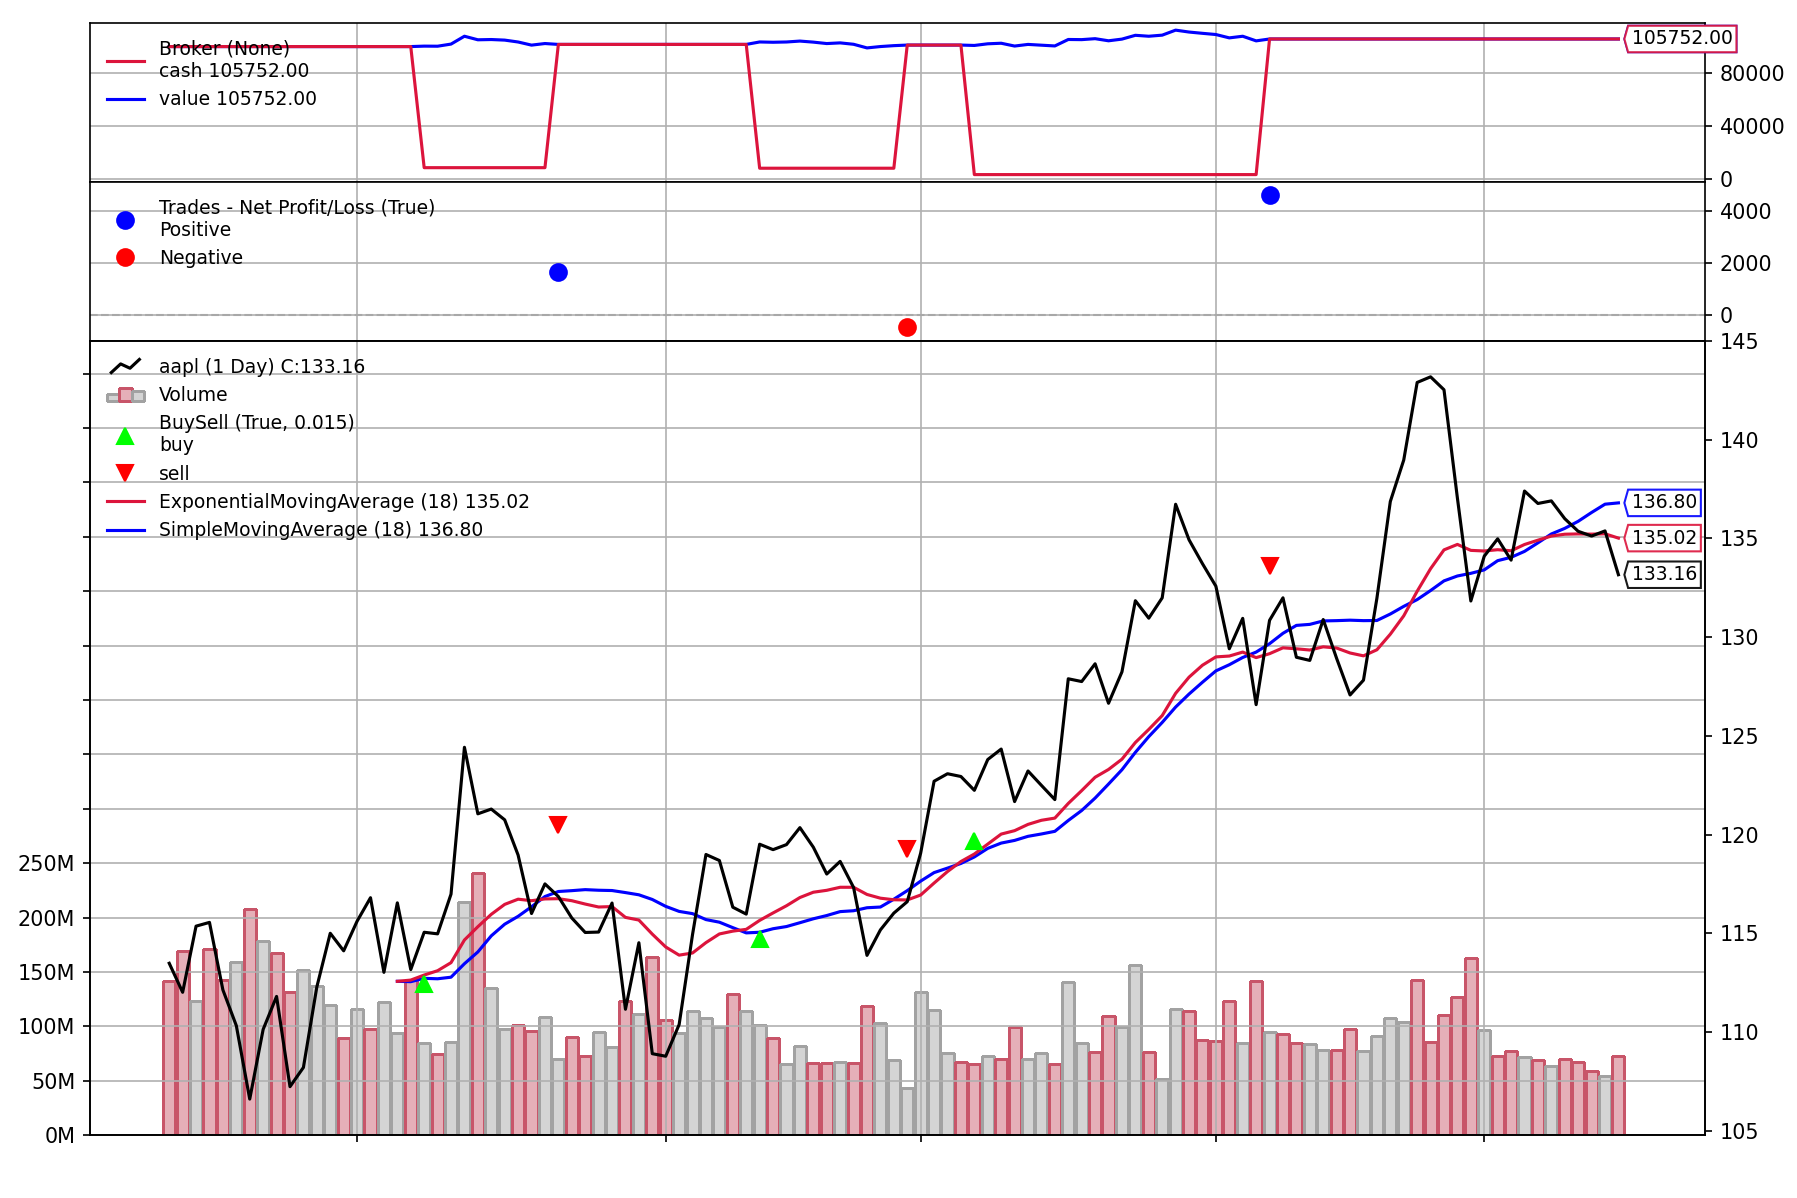

In [53]:
#AAPLE
run_model('aapl.csv',fromdate,todate,startcash,stake = 800)

startcash: 100000.00
2020-10-06, BUY CREATED, 1452.47
2020-10-30, SELL CREATED, 1621.08
2020-11-02, OPERATION PROFIT, GROSS 4916.10, NET 4916.10
2020-11-04, BUY CREATED, 1749.14
2020-11-23, SELL CREATED, 1733.52
2020-11-24, OPERATION PROFIT, GROSS -1515.00, NET -1515.00
2021-01-06, BUY CREATED, 1736.19
2021-02-16,  Ending Value 114858.70


<IPython.core.display.Javascript object>


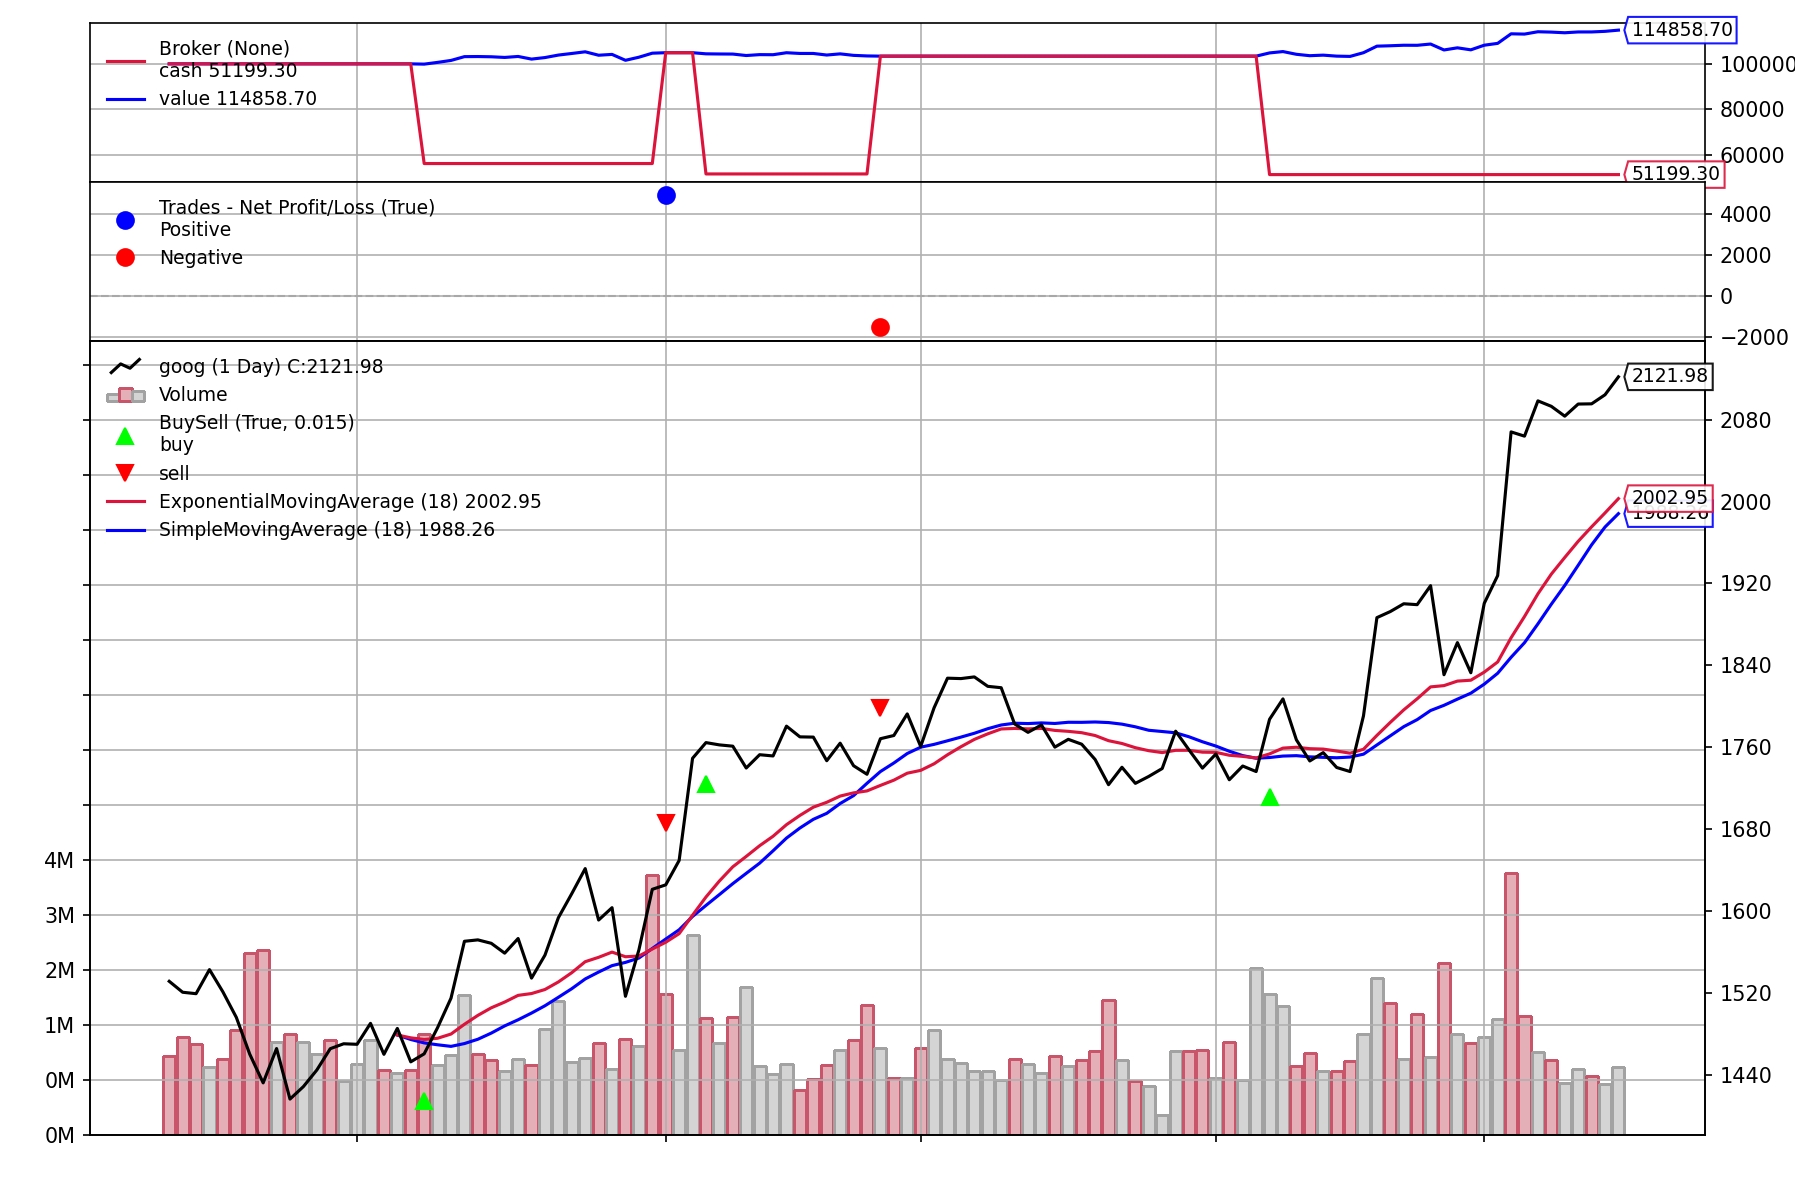

In [54]:
#GOOGLE
run_model('goog.csv',fromdate,todate,startcash,stake =30)

startcash: 100000.00
2020-10-06, BUY CREATED, 505.87
2020-10-07, BUY CREATED, 534.54
2020-10-08, BUY CREATED, 531.79
2020-10-09, BUY CREATED, 539.45
2020-10-12, BUY CREATED, 539.70
2020-10-13, BUY CREATED, 554.08
2020-10-14, BUY CREATED, 541.26
2020-10-15, BUY CREATED, 542.09
2020-10-16, BUY CREATED, 530.70
2020-10-19, BUY CREATED, 530.92
2020-11-11, BUY CREATED, 490.76
2020-11-12, BUY CREATED, 486.77
2020-11-13, BUY CREATED, 482.82
2020-11-16, BUY CREATED, 478.04
2020-12-28, SELL CREATED, 519.01
2020-12-29, OPERATION PROFIT, GROSS 8274.24, NET 8274.24
2020-12-29, BUY CREATED, 530.87
2021-01-20, BUY CREATED, 586.25
2021-01-21, BUY CREATED, 579.84
2021-01-22, BUY CREATED, 564.91
2021-01-25, BUY CREATED, 556.63
2021-01-26, BUY CREATED, 561.94
2021-01-27, BUY CREATED, 522.80
2021-01-28, BUY CREATED, 538.59
2021-01-29, BUY CREATED, 532.39
2021-02-01, BUY CREATED, 538.71
2021-02-02, BUY CREATED, 548.17
2021-02-03, BUY CREATED, 539.30
2021-02-04, BUY CREATED, 552.37
2021-02-05, BUY CREATED, 

<IPython.core.display.Javascript object>


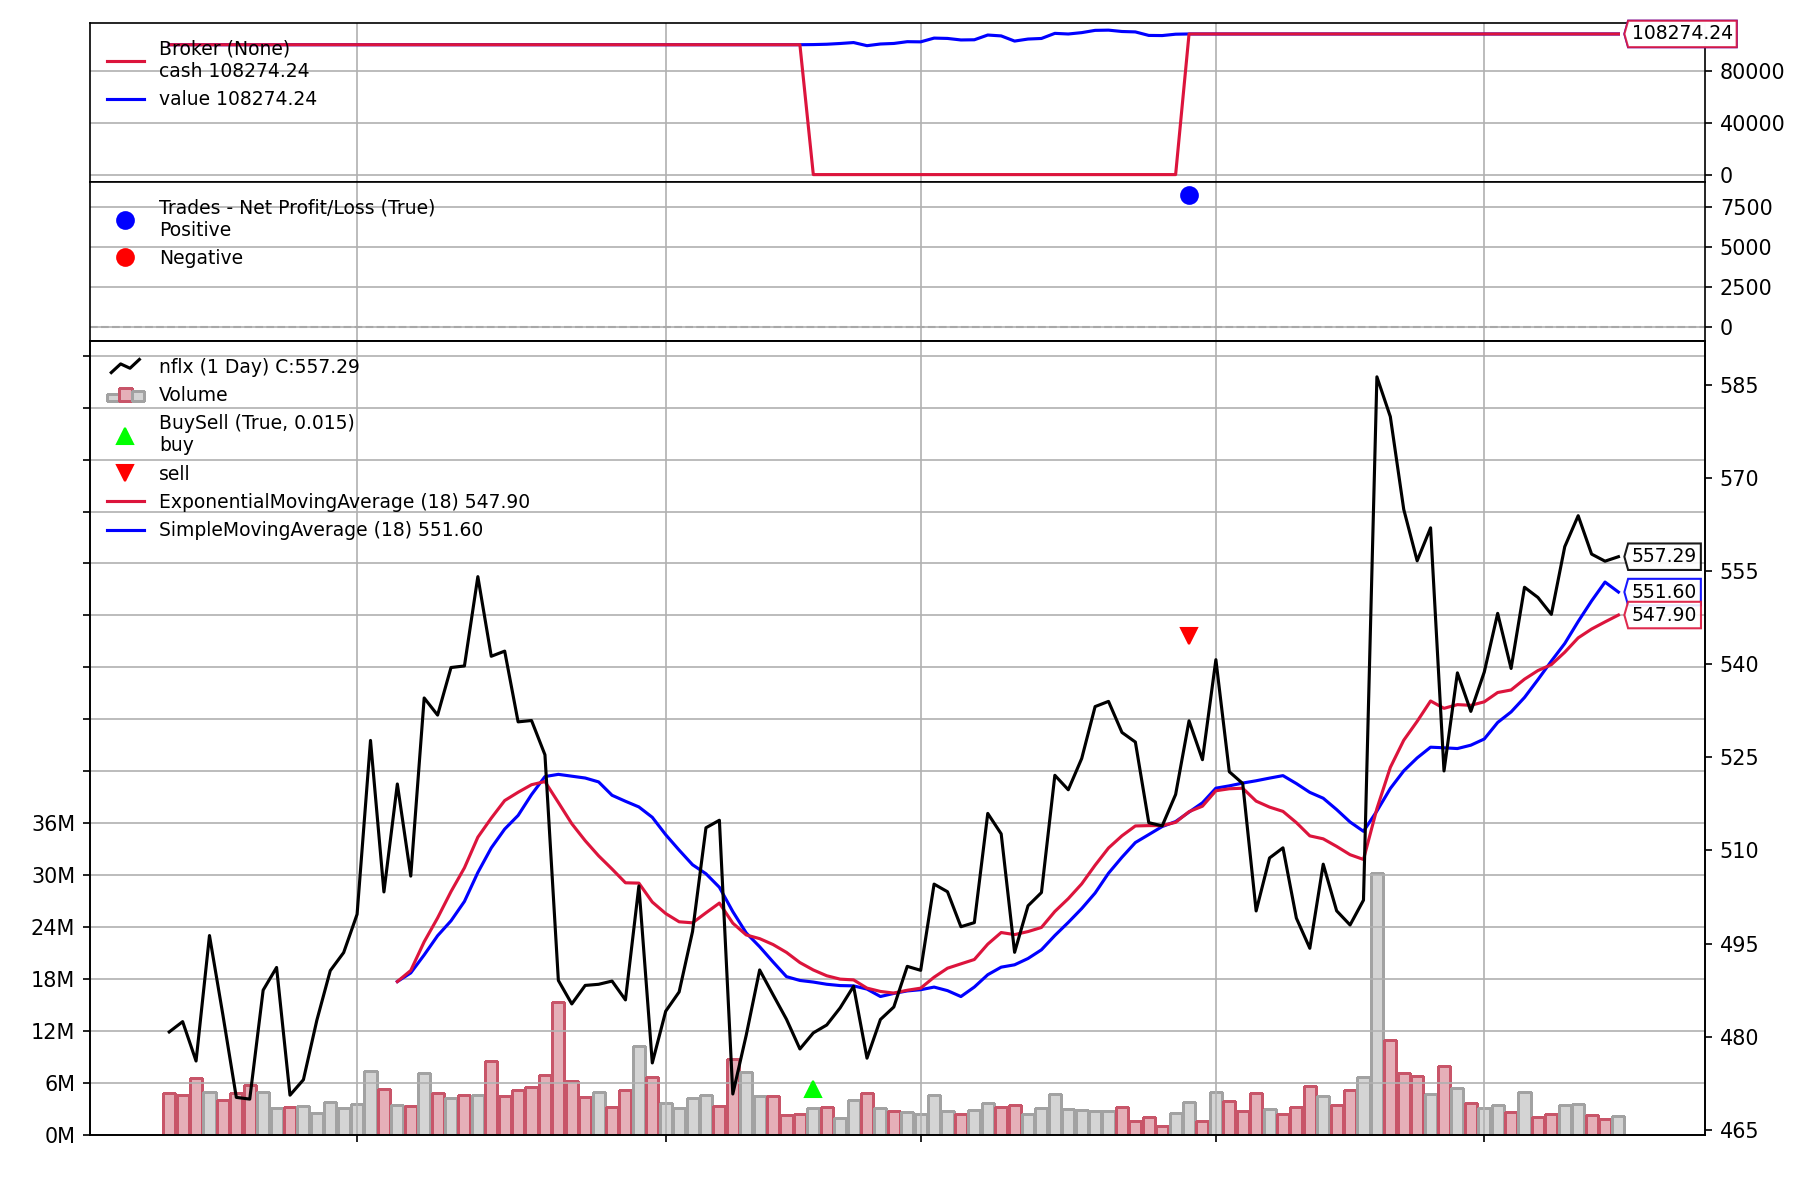

In [55]:
#NETFLIX
run_model('nflx.csv',fromdate,todate,startcash,stake =208)

startcash: 100000.00
2020-10-12, BUY CREATED, 442.00
2020-10-21, SELL CREATED, 422.50
2020-10-22, OPERATION PROFIT, GROSS -37.16, NET -37.16
2020-11-10, BUY CREATED, 410.41
2020-12-14, SELL CREATED, 639.79
2020-12-15, OPERATION PROFIT, GROSS 42396.64, NET 42396.64
2021-01-05, BUY CREATED, 735.05
2021-01-25, SELL CREATED, 880.81
2021-01-26, OPERATION PROFIT, GROSS 24850.43, NET 24850.43
2021-02-16,  Ending Value 167209.91


<IPython.core.display.Javascript object>


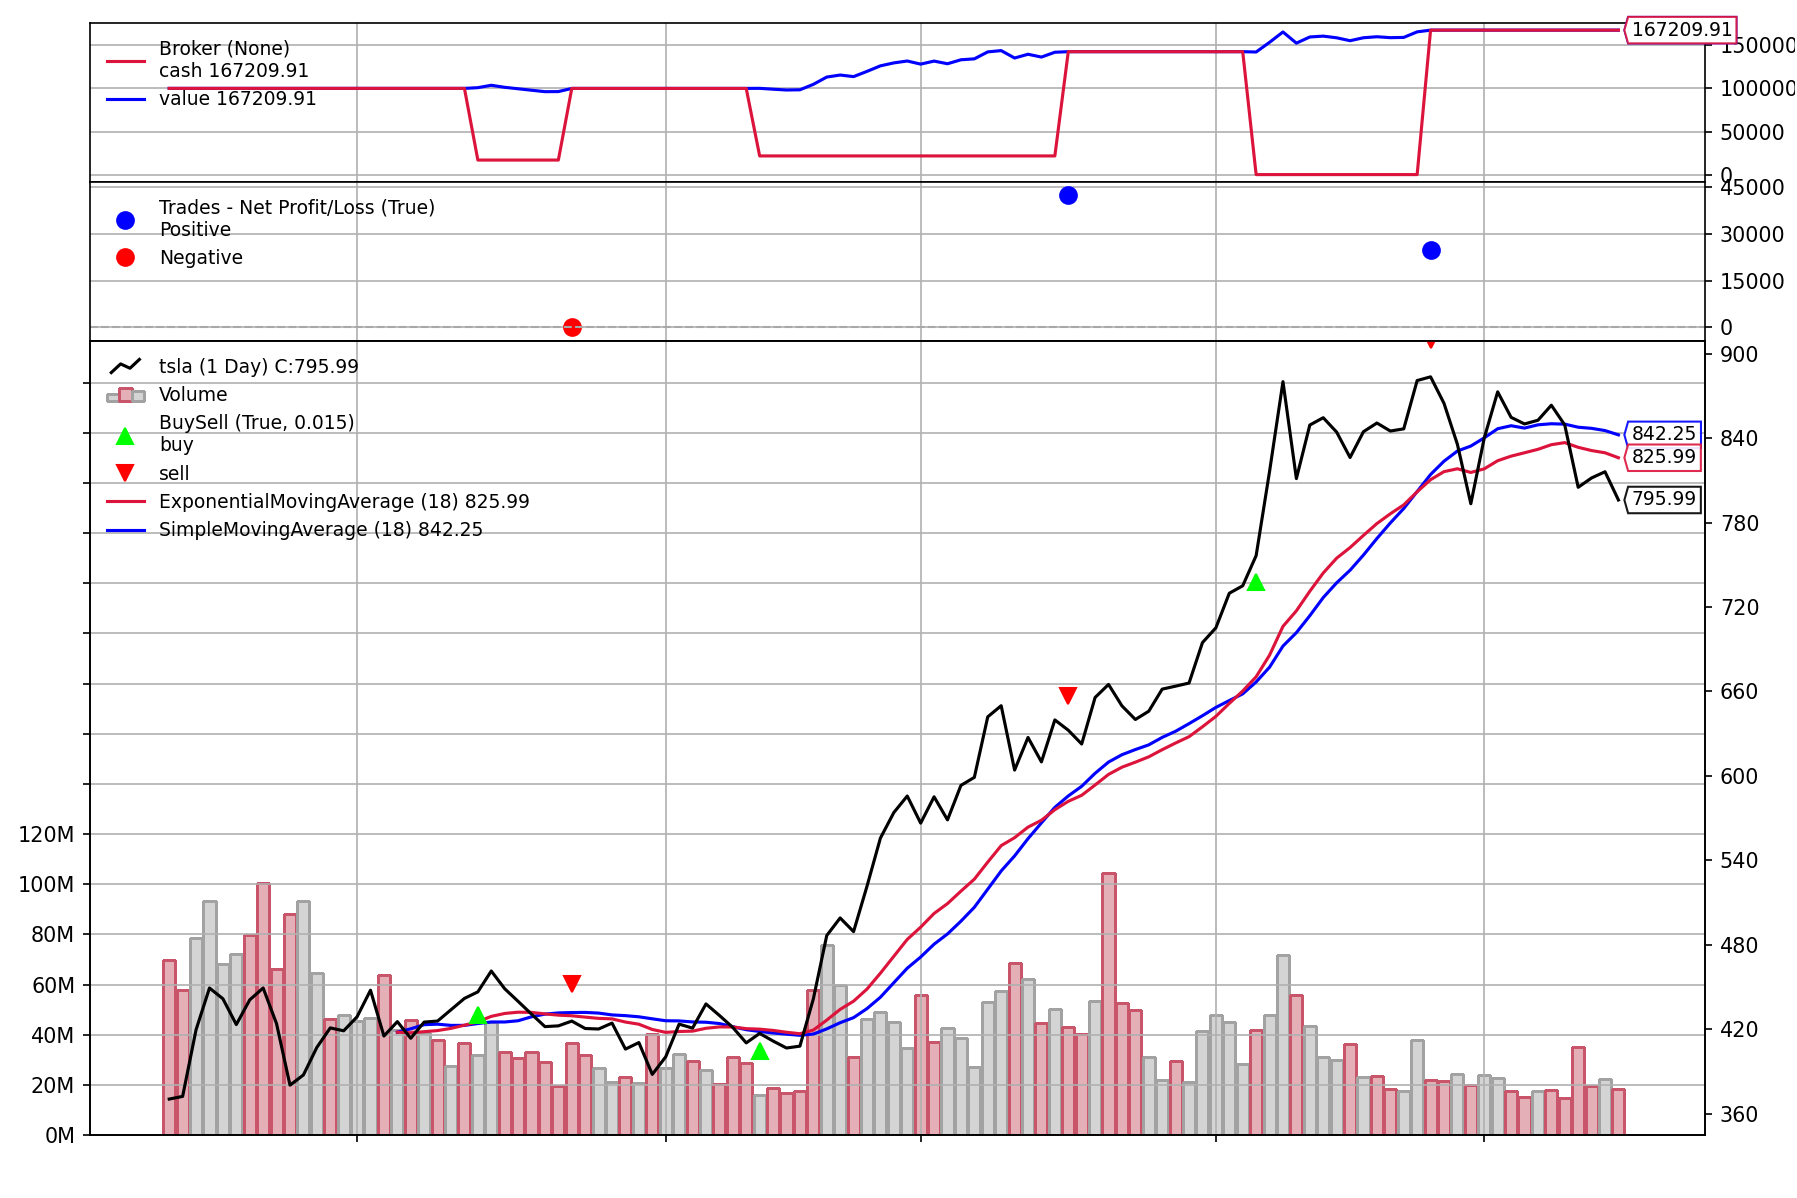

In [56]:
#TESLA
run_model('tsla.csv',fromdate,todate,startcash,stake =187)

startcash: 100000.00
2020-10-06, BUY CREATED, 549.36
2020-10-07, BUY CREATED, 558.56
2020-10-08, BUY CREATED, 553.79
2020-10-09, BUY CREATED, 550.54
2020-10-12, BUY CREATED, 568.71
2020-10-13, BUY CREATED, 569.91
2020-10-14, BUY CREATED, 563.61
2020-10-15, BUY CREATED, 558.85
2020-10-16, BUY CREATED, 552.46
2020-11-06, BUY CREATED, 582.59
2020-11-09, BUY CREATED, 545.41
2020-11-10, BUY CREATED, 510.55
2020-11-24, SELL CREATED, 518.46
2020-11-25, OPERATION PROFIT, GROSS -161.50, NET -161.50
2020-12-03, BUY CREATED, 536.12
2020-12-04, BUY CREATED, 542.39
2020-12-07, BUY CREATED, 544.43
2020-12-08, BUY CREATED, 533.84
2020-12-09, BUY CREATED, 517.23
2020-12-10, SELL CREATED, 518.72
2020-12-11, OPERATION PROFIT, GROSS 746.70, NET 746.70
2020-12-15, BUY CREATED, 534.49
2020-12-16, BUY CREATED, 529.49
2020-12-17, BUY CREATED, 533.75
2021-01-04, BUY CREATED, 524.54
2021-01-06, SELL CREATED, 504.96
2021-01-07, OPERATION PROFIT, GROSS -1005.10, NET -1005.10
2021-01-11, BUY CREATED, 544.57
2021-

<IPython.core.display.Javascript object>


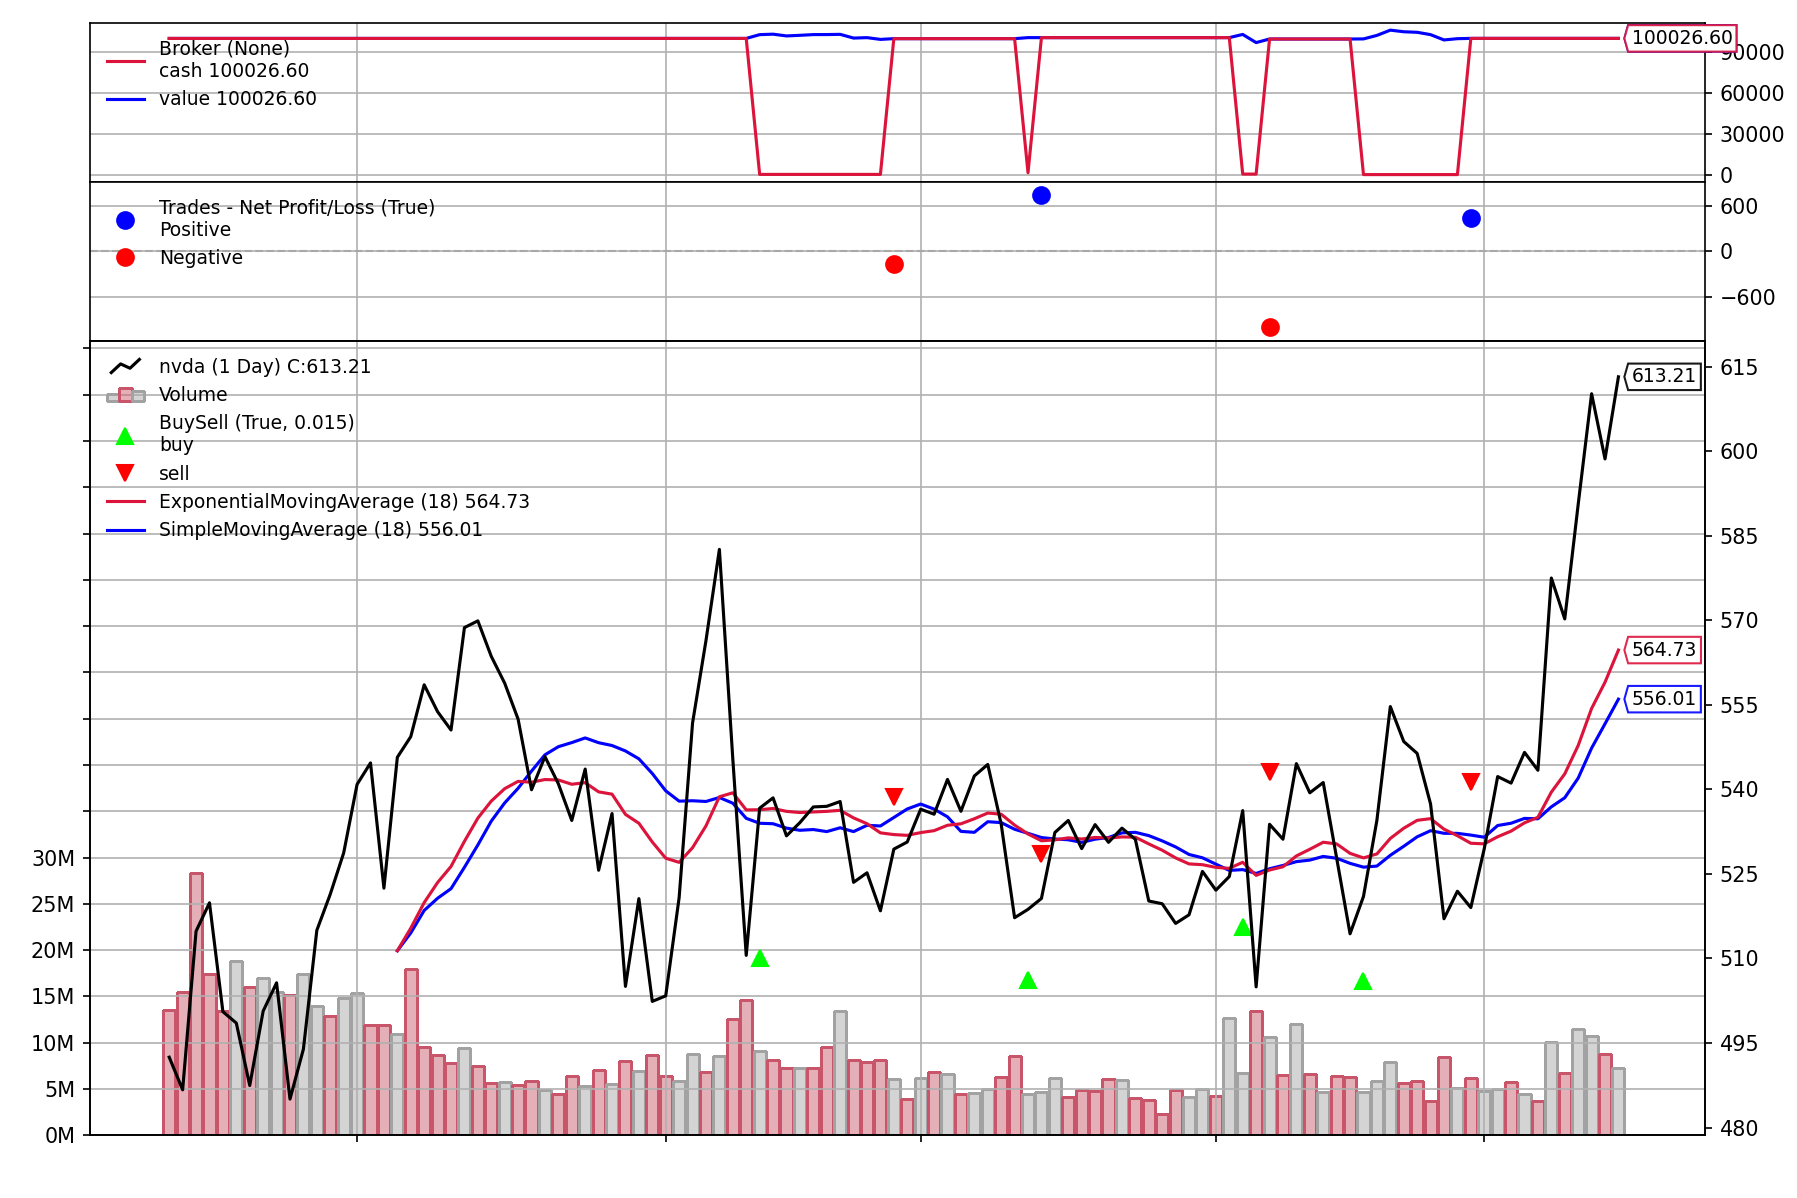

In [57]:
#NVIDA
run_model('nvda.csv',fromdate,todate,startcash,stake =190)

# Back-test for 5 stocks

In [59]:
class TestStrategy_5stocks(bt.Strategy):

    params = dict(period = 18,
                  stake = 50)
        
    def log(self, txt, dt=None, doprint=False):
        if doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):

        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.smainds = dict()
        self.emainds = dict()

        for i, d in enumerate(self.datas):
            self.smainds[d] = bt.ind.SMA(d.close, period=self.p.period)
            self.emainds[d] = bt.ind.EMA(d.close, period=self.p.period)
        
    def next(self):
        for i, d in enumerate(self.datas):
            pos = self.getposition(d)
            if not len(pos):                               
                if self.emainds[d][0] > self.smainds[d][0]: # meet buy condition
                    self.log('BUY CREATED, %.2f' %self.dataclose[0], doprint=True)
                    self.buy(data = d, size = self.p.stake)  
            elif self.emainds[d][0] < self.smainds[d][0]: # meet sell condition
                self.log('SELL CREATED, %.2f' %self.dataclose[0], doprint=True)
                self.sell(data = d)         


    def notify_order(self, order):

        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        
        if not trade.isclosed:
            return
        
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm), doprint=True)

    def stop(self):
        self.log(u' Ending Value %.2f' %
                 (self.broker.getvalue()), doprint=True)

In [67]:
def run_model_5stocks(strategy,datalist, stakenum):

      cerebro = bt.Cerebro()

      cerebro.addstrategy(TestStrategy_5stocks)

      cerebro.addsizer(bt.sizers.FixedSize, stake=stakenum)

      cerebro.broker.setcash(100000)

      fromdate = datetime(2021,7,15)
      todate = datetime(2022,2,16)

      for key in datalist:
            data = bt.feeds.GenericCSVData(dataname = key,
                           fromdate = fromdate,
                           todate = todate,
                           datetime = 0,
                           open = 1,
                           high = 2,
                           low = 3,
                           close = 4,
                           volume = 5,
                           dtformat='%Y%m%d')
    
            cerebro.adddata(data, name = key)

      results = cerebro.run()

      portvalue = cerebro.broker.getvalue()
      pnl = portvalue - startcash

      print(f'total: {round(portvalue,2)}')
      print(f'benefit: {round(pnl,2)}')
    
      plt.rcParams['figure.figsize'] = [12, 10]
      cerebro.plot(iplot = True)

2021-08-10, BUY CREATED, 145.61
2021-08-10, BUY CREATED, 145.61
2021-08-10, BUY CREATED, 145.61
2021-08-10, BUY CREATED, 145.61
2021-08-12, SELL CREATED, 148.88
2021-08-13, OPERATION PROFIT, GROSS 145.00, NET 145.00
2021-08-13, BUY CREATED, 149.10
2021-08-16, SELL CREATED, 151.12
2021-08-17, OPERATION PROFIT, GROSS -2002.00, NET -2002.00
2021-08-24, BUY CREATED, 149.63
2021-08-25, BUY CREATED, 148.37
2021-08-26, BUY CREATED, 147.54
2021-08-27, BUY CREATED, 148.60
2021-08-30, BUY CREATED, 153.10
2021-08-31, BUY CREATED, 151.83
2021-09-01, BUY CREATED, 152.54
2021-09-02, BUY CREATED, 153.71
2021-09-02, BUY CREATED, 153.71
2021-09-03, BUY CREATED, 154.31
2021-09-07, BUY CREATED, 156.70
2021-09-08, BUY CREATED, 155.12
2021-09-09, BUY CREATED, 154.10
2021-09-10, BUY CREATED, 149.00
2021-09-14, SELL CREATED, 148.19
2021-09-15, OPERATION PROFIT, GROSS -1.50, NET -1.50
2021-09-15, SELL CREATED, 149.10
2021-09-16, OPERATION PROFIT, GROSS 3361.50, NET 3361.50
2021-09-20, SELL CREATED, 142.97
202

<IPython.core.display.Javascript object>


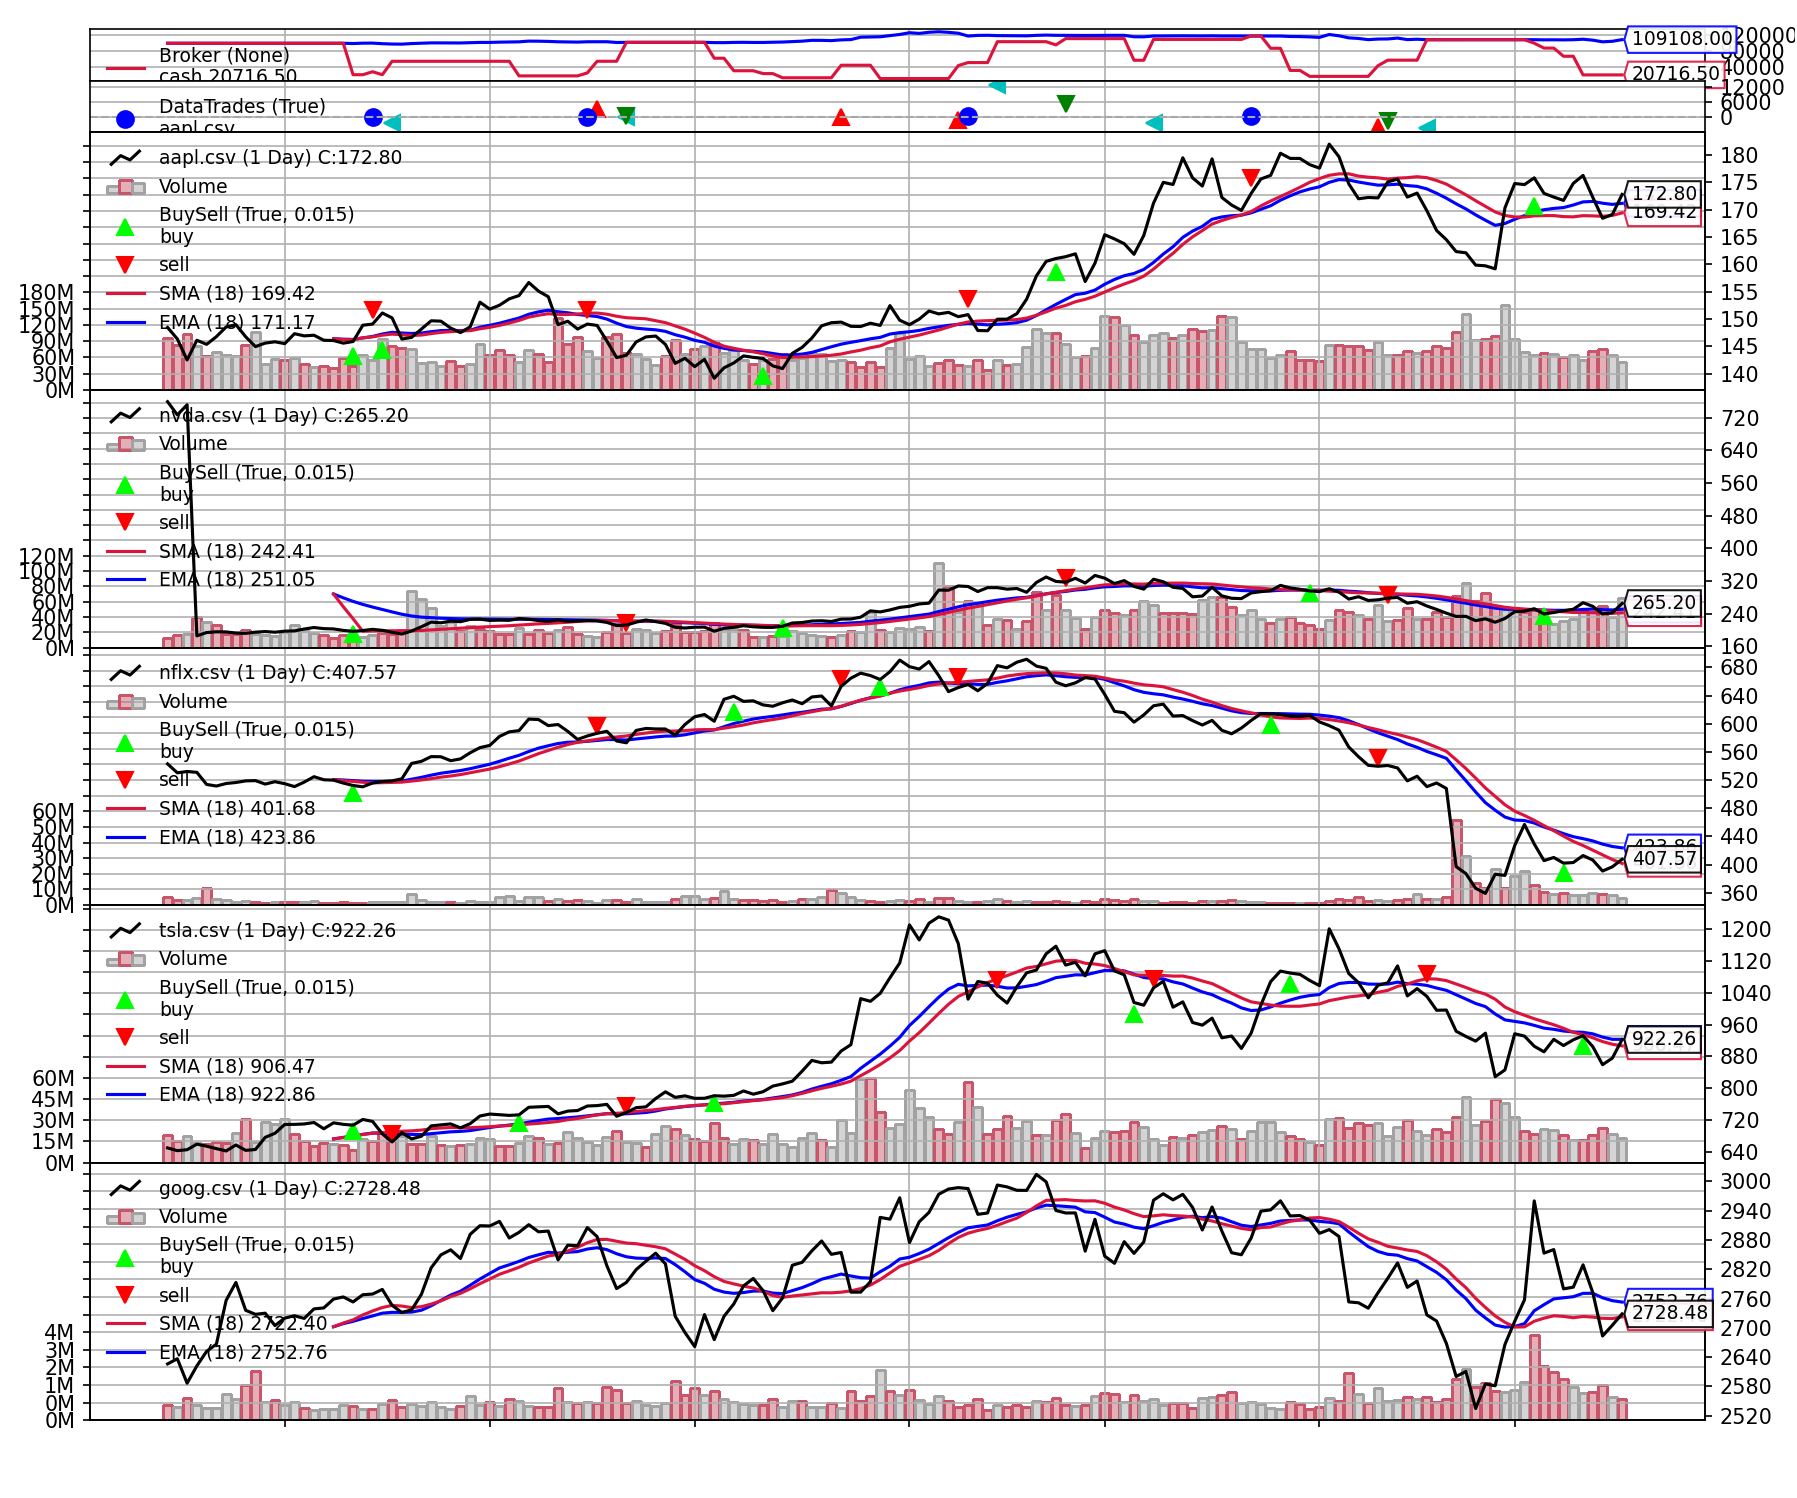

In [68]:
data_list = ['aapl.csv','nvda.csv','nflx.csv','tsla.csv','goog.csv']
stakenum = 50
run_model_5stocks(TestStrategy_5stocks,data_list,stakenum)

## CNN and paper trading 

In [1]:
import abc
import threading
import time
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential, model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from alpaca_trade_api import REST


class AlpacaPaperSocket(REST):
    def __init__(self):
        super().__init__(
            key_id="PKS5R0SYS91KLOP52DXR",
            secret_key="HXsxcrvPtva2xhkK7NNZ3IwZspl5EuyBpvi26Doo",
            base_url='https://paper-api.alpaca.markets'
        )


class TradingSystem(abc.ABC):

    def __init__(self, api, symbol, time_frame, system_id, system_label):
        self.api = api
        self.symbol = symbol
        self.time_frame = time_frame
        self.system_id = system_id
        self.system_label = system_label
        thread = threading.Thread(target=self.system_loop)
        thread.start()

    @abc.abstractmethod
    def place_buy_order(self):
        pass

    @abc.abstractmethod
    def place_sell_order(self):
        pass

    @abc.abstractmethod
    def system_loop(self):
        pass

# Class to develop your AI portfolio manager
class PMModelDevelopment:

    def __init__(self,filename,stockname):#filename is a string
        data = pd.read_csv(filename)
        X = data['Delta Close']
        y = data.drop(['Delta Close'], axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X, y)

        network = Sequential()

        network.add(Dense(1, input_shape=(1,), activation='tanh'))
        network.add(Dense(3, activation='tanh'))
        network.add(Dense(3, activation='tanh'))
        network.add(Dense(3, activation='tanh'))
        network.add(Dense(1, activation='tanh'))

        network.compile(
                      optimizer='rmsprop',
                      loss='hinge',
                      metrics=['accuracy']
                      )
        network.fit(X_train.values, y_train.values, epochs=50)

        y_pred = network.predict(X_test.values)
        y_pred = np.around(y_pred, 0)
        print(classification_report(y_test, y_pred))

        model = network.to_json()
        with open((stockname + "_model.json"), "w") as json_file:
            json_file.write(model)

        network.save_weights((stockname + "_weights.h5"))

# AI Portfolio Manager
class PortfolioManagementModel:

    def __init__(self,filename,stockname):
        data = pd.read_csv(filename)
        X = data['Delta Close']
        y = data.drop(['Delta Close'], axis=1)

        json_file = open((stockname + '_model.json'), 'r')
        json = json_file.read()
        json_file.close()
        self.network = model_from_json(json)

        self.network.load_weights((stockname + "_weights.h5"))

        y_pred = self.network.predict(X.values)
        y_pred = np.around(y_pred, 0)
        print(classification_report(y, y_pred))

class PortfolioManagementSystem(TradingSystem):

    def __init__(self,filename,stockname):
        super().__init__(AlpacaPaperSocket(), stockname, 86400, 1, 'AI_PM')
        self.AI = PortfolioManagementModel(filename,stockname)

    def place_buy_order(self):
        self.api.submit_order(
                        symbol=stockname,
                        qty=1,
                        side='buy',
                        type='market',
                        time_in_force='day',
                    )

    def place_sell_order(self):
        self.api.submit_order(
                        symbol=stockname,
                        qty=1,
                        side='sell',
                        type='market',
                        time_in_force='day',
                    )

    def system_loop(self):
        this_weeks_close = 0
        last_weeks_close = 0
        delta = 0
        day_count = 0
        while(True):
            time.sleep(20)
            data_req = self.api.get_barset(stockname, timeframe='day', limit=1).df
            x = pd.DataFrame(
                data=[[
                    data_req[stockname]['close'][0]]], columns='Close'.split()
            )
            day_count += 1
            if(day_count == 5):
                day_count = 0
                last_weeks_close = this_weeks_close
                this_weeks_close = x['Close']
                delta = this_weeks_close - last_weeks_close
                if np.around(self.AI.network.predict([delta])) <= -.5:
                    self.place_sell_order()
                elif np.around(self.AI.network.predict([delta])) >= .5:
                    self.place_buy_order()




In [2]:
filename ='IBM.csv'
stockname ='IBM'
PMModelDevelopment(filename,stockname)
PortfolioManagementModel(filename,stockname)

Epoch 1/50
7/7 [==============================] - 1s 1ms/step - loss: 0.9805 - accuracy: 0.2769
Epoch 2/50
7/7 [==============================] - 0s 1ms/step - loss: 0.9609 - accuracy: 0.2769
Epoch 3/50
7/7 [==============================] - 0s 1ms/step - loss: 0.9459 - accuracy: 0.2769
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.9302 - accuracy: 0.2769
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.9143 - accuracy: 0.2769
Epoch 6/50
7/7 [==============================] - 0s 1ms/step - loss: 0.8996 - accuracy: 0.2769
Epoch 7/50
7/7 [==============================] - 0s 1ms/step - loss: 0.8846 - accuracy: 0.2769
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8694 - accuracy: 0.2769
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8526 - accuracy: 0.2769
Epoch 10/50
7/7 [==============================] - 0s 1ms/step - loss: 0.8366 - accuracy: 0.2769
Epoch 11/50
7/7 [======================

In [6]:
file_stock = [('AAPL.csv','AAPL'),('NFLX.csv','NFLX'),('GOOG.csv','GOOG'),('NVDA.csv','NVDA'),('TSLA.csv','TSLA')]

for (filename,stockname) in file_stock:
    PMModelDevelopment(filename,stockname)
    PortfolioManagementModel(filename,stockname)
    PortfolioManagementSystem(filename,stockname)